In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.cluster import KMeans# implements the K-Means algorithm for clustering.
from sklearn import metrics

In [41]:
dji = pd.read_csv('./dow_jones_index.data', sep=',')

In [42]:
dji.drop(columns=['percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], inplace=True)
dji.head()

,quarter,stock,date,open,high,low,close,volume
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761


In [43]:
def corrigir_campo_valor(valor):
    valor = valor.replace('$', '')
    return float(valor)

In [44]:
def corrigir_data(data):
    data = data[:1]
    return data

In [45]:
dji['open'] = dji['open'].apply(corrigir_campo_valor)
dji['high'] = dji['high'].apply(corrigir_campo_valor)
dji['low'] = dji['low'].apply(corrigir_campo_valor)
dji['close'] = dji['close'].apply(corrigir_campo_valor)
dji['date'] = dji['date'].apply(corrigir_data)

In [46]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  750 non-null    int64  
 1   stock    750 non-null    object 
 2   date     750 non-null    object 
 3   open     750 non-null    float64
 4   high     750 non-null    float64
 5   low      750 non-null    float64
 6   close    750 non-null    float64
 7   volume   750 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 47.0+ KB


In [47]:
dji = dji.sort_values(by='date')

In [48]:
mes = '3'
df_mes = dji[dji['date'] == mes]

In [49]:
train_x = df_mes[['close', 'volume']]

train_x.shape

(120, 2)

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
x_clustered = kmeans.predict(train_x)

Text(0, 0.5, 'volume')

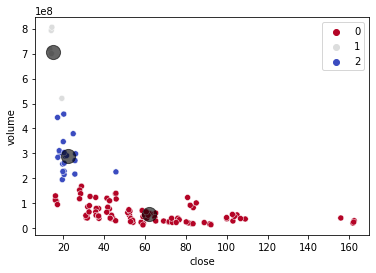

In [51]:
sns.scatterplot(data=df_mes, x='close', y='volume', hue=x_clustered, palette='coolwarm_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.xlabel('close')
plt.ylabel('volume')

In [52]:
new_data = [[41.37, 6547812]]
y_pred = kmeans.predict(new_data)
y_pred

array([0])

In [53]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

In [54]:
for i in range(x_clustered.shape[0]):
  if x_clustered[i] == 0:
    cluster_0.append(df_mes.iloc[i]['stock'])
  elif x_clustered[i] == 1:
    cluster_1.append(df_mes.iloc[i]['stock'])
  elif x_clustered[i] == 2:
    cluster_2.append(df_mes.iloc[i]['stock'])

In [55]:
cluster_0 = pd.Series(cluster_0)
cluster_0.drop_duplicates(inplace=True)
cluster_0

0      JNJ
1      CAT
4      TRV
6        T
12      BA
13     XOM
17      AA
21     WMT
25     AXP
29      VZ
30     UTX
42      PG
43     HPQ
44      KO
49     IBM
51      HD
52     MCD
60    KRFT
63     JPM
72     CVX
73      DD
81     MMM
87     MRK
89     DIS
dtype: object

In [56]:
cluster_1 = pd.Series(cluster_1)
cluster_1.drop_duplicates(inplace=True)
cluster_1


0    BAC
4     GE
dtype: object

In [57]:
cluster_2 = pd.Series(cluster_2)
cluster_2.drop_duplicates(inplace=True)
cluster_2

0     CSCO
4     INTC
5      JPM
9      PFE
12    MSFT
16      GE
dtype: object